# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 200

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 200 total reviews
Scraping page 2
   ---> 400 total reviews
Scraping page 3
   ---> 600 total reviews
Scraping page 4
   ---> 800 total reviews
Scraping page 5
   ---> 1000 total reviews
Scraping page 6
   ---> 1200 total reviews
Scraping page 7
   ---> 1400 total reviews
Scraping page 8
   ---> 1600 total reviews
Scraping page 9
   ---> 1800 total reviews
Scraping page 10
   ---> 2000 total reviews
Scraping page 11
   ---> 2200 total reviews
Scraping page 12
   ---> 2400 total reviews
Scraping page 13
   ---> 2600 total reviews
Scraping page 14
   ---> 2800 total reviews
Scraping page 15
   ---> 3000 total reviews
Scraping page 16
   ---> 3200 total reviews
Scraping page 17
   ---> 3400 total reviews
Scraping page 18
   ---> 3600 total reviews
Scraping page 19
   ---> 3800 total reviews
Scraping page 20
   ---> 3874 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Appalling service with fai...
1,✅ Trip Verified | British Airways charge you f...
2,✅ Trip Verified | What is wrong with you guys?...
3,✅ Trip Verified | We booked two business cla...
4,✅ Trip Verified | I’ve flown with many airline...


In [6]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
# Check for missing values
missing_values= df.isnull().sum()
print(missing_values)

# Drop rows with missing review text if any
df.dropna(subset=['reviews'], inplace=True)

# Convert reviews to lowercase
df['reviews'] = df['reviews'].str.lower()

# Remove special characters (you can modify the regex to remove more unwanted characters)
df['reviews'] = df['reviews'].str.replace(r'[^\w\s]', '')

reviews    0
dtype: int64


In [8]:
df['reviews'] = df['reviews'].str.replace("✅ trip verified", "", regex=False)
df['reviews'] = df['reviews'].str.replace('|', '', regex=False)

# Check the cleaned data

df['reviews'] = df['reviews'].str.strip()
df.head()

,reviews
0,appalling service with failing defective fleet...
1,british airways charge you for the pleasure of...
2,what is wrong with you guys? people pay lots o...
3,we booked two business class seat with british...
4,"i’ve flown with many airlines, but my recent e..."


# Text Analysis
## a)Word cloud
A word cloud helps visualize the most frequent words in your dataset.This will show the most common words in the reviews, which can give you insight into common themes.



In [9]:
!pip install wordcloud


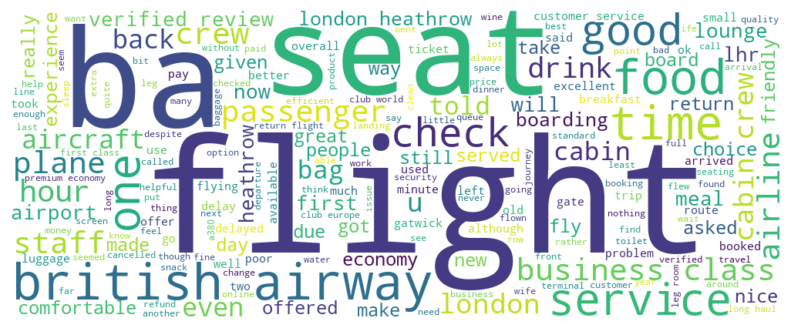

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = " ".join(df['reviews'])

# Generate word cloud
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## b) Sentiment Analysis
Sentiment analysis can help you understand the overall tone of the reviews (positive, negative, neutral).

In [11]:
!pip install textblob

In [12]:
from textblob import TextBlob

# Function to get the sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the reviews
df['sentiment'] = df['reviews'].apply(get_sentiment)

# Display the first few rows with sentiment
df.head()

# Optional: categorize sentiment as positive, neutral, or negative
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))
df.head()

,reviews,sentiment,sentiment_label
0,appalling service with failing defective fleet...,0.006250,positive
1,british airways charge you for the pleasure of...,0.165332,positive
2,what is wrong with you guys? people pay lots o...,-0.052083,negative
3,we booked two business class seat with british...,-0.255556,negative
4,"i’ve flown with many airlines, but my recent e...",0.019805,positive


## 1)Overall sentiment distribution
Below, we are calculating what is the percentage of each kind of reviews in the sentiment_label.This gives what is the overall sentiment distribution regarding the airways

sentiment_label
positive    69.411461
negative    30.098090
neutral      0.490449
Name: proportion, dtype: float64


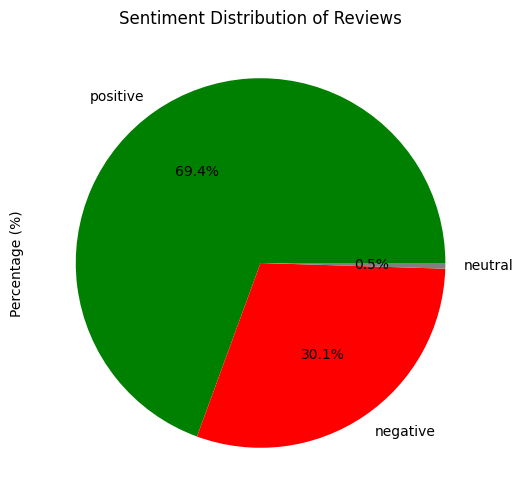

In [33]:
sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100
print(sentiment_counts)

# Plotting the sentiment distribution as a bar chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'grey'], figsize=(6, 6))

# Adding titles and labels
plt.title('Sentiment Distribution of Reviews')
plt.ylabel('Percentage (%)')

# Display the plot
plt.show()

In [14]:
negative_reviews = df[df['sentiment_label'] == 'negative']['reviews']
print(negative_reviews)
# Create a word cloud or topic model from the negative reviews

2       what is wrong with you guys? people pay lots o...
3       we booked two business class seat with british...
8       british airways flight from edinburgh got dela...
12      horrible service from boarding to landing. i f...
13      not verified   my wife and i are very disappoi...
                              ...                        
3846    flew from san francisco to heathrow london. fl...
3847    i flew singapore to sydney with them recently ...
3856    ba 059 london to cape town april 29 2014 econo...
3868    just got back from bridgetown barbados flying ...
3873    sin-lhr ba12 b747-436 first class. old aircraf...
Name: reviews, Length: 1166, dtype: object


## 2) Key Areas for Improvement
By analyzing the words most frequently used in negative reviews (using techniques like **word clouds** or **topic modeling**), you can identify specific areas where the airline is underperforming (e.g., flight delays, poor customer service, etc.).

### A) Word cloud

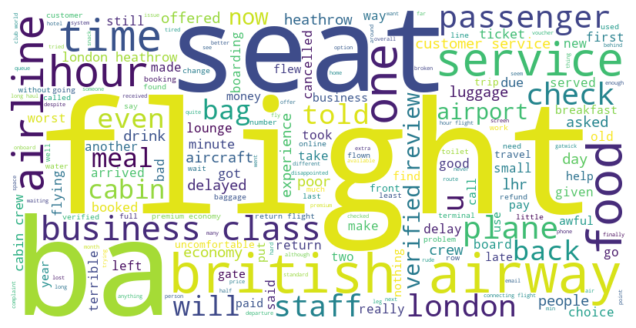

In [34]:
text = " ".join(negative_reviews)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### b) Topic Modeling

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import string

# Download NLTK stop words if not already available
nltk.download('stopwords')

# Preprocess the negative reviews
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words(Common words like if, an,of in english which doesnt add meaning in general)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to each negative review
processed_reviews = negative_reviews.apply(preprocess_text)

# Tokenize and create a term-document matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(processed_reviews)

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(dtm)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top words in each topic
n_top_words = 10  # Display top 10 words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-n_top_words:]])  # Top 10 words in the topic
    print()


[nltk_data] Downloading package stopwords to C:\Users\Nithish
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic #1:
['flight', 'airline', 'luggage', 'london', 'staff', 'airways', 'british', 'customer', 'service', 'ba']

Topic #2:
['seats', 'served', 'time', 'offered', 'passengers', 'service', 'meal', 'ba', 'food', 'flight']

Topic #3:
['airways', 'british', 'food', 'club', 'economy', 'ba', 'seat', 'seats', 'business', 'class']

Topic #4:
['check', 'airport', 'time', 'airways', 'british', 'told', 'london', 'hours', 'ba', 'flight']

Topic #5:
['seats', 'london', 'poor', 'service', 'food', 'crew', 'ba', 'seat', 'cabin', 'flight']



## Insights from the above topics individually
**Topic -1:** There may be complaints about luggage handling or staff service at London airports or other related issues with customer service. Addressing customer experience issues and improving the handling of luggage can enhance satisfaction in this area.\
**Topic-2:** The airline may need to review food quality, meal offerings, or timeliness of service. Improving the in-flight dining experience can lead to more positive reviews.\
**Topic-3:** Focus on improving the comfort of seats in economy class, while maintaining or enhancing the premium services in business/club class. Additionally, consider evaluating the food quality for different classes, as it might differ based on seating options.\
**Topic-4:** There might be a need for improvements in airport efficiency, specifically check-in processes and communication of flight timings. Optimizing these processes can improve the overall passenger experience and reduce complaints.\
**Topic-5:** Improving seat comfort and in-flight service could have a significant positive impact. Passengers might be experiencing discomfort with seats, poor crew behavior, or poor food quality during flights.\
### Based on the above insights, BA should focus on below areas for enhanced customer satisfaction
- Enhance luggage handling and staff service
- Improve food quality and meal service
- Seating Comfort and Class-Specific Services
- Airport Efficiency and Check-in Processes

## 3) Positives from the customer reviews

### A) Word Cloud

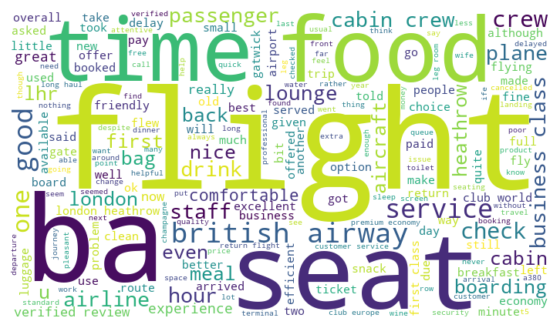

In [37]:
positive_reviews = df[df['sentiment_label'] == 'positive']['reviews']
text = " ".join(positive_reviews)

# Generate word cloud
wordcloud = WordCloud(width=700, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### B) Topic Modelling

In [22]:

# Preprocess the positive reviews
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words(Common words like if, an,of in english which doesnt add meaning in general)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to each positive review
processed_reviews = positive_reviews.apply(preprocess_text)

# Tokenize and create a term-document matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(processed_reviews)

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(dtm)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top words in each topic
n_top_words = 10  # Display top 10 words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-n_top_words:]])  # Top 10 words in the topic
    print()


Topic #1:
['airport', 'time', 'hours', 'london', 'staff', 'ba', 'british', 'airways', 'told', 'flight']

Topic #2:
['booked', 'airline', 'hours', 'customer', 'service', 'seat', 'flights', 'seats', 'flight', 'ba']

Topic #3:
['service', 'cabin', 'seats', 'crew', 'ba', 'class', 'food', 'seat', 'flight', 'good']

Topic #4:
['heathrow', 'food', 'ba', 'good', 'service', 'boarding', 'cabin', 'time', 'crew', 'flight']

Topic #5:
['airlines', 'verified', 'review', 'airline', 'london', 'service', 'flight', 'ba', 'airways', 'british']



## Insights from the above topics individually
**Topic -1:** Passengers appreciate the punctuality of flights and the staff service at London airports, particularly Heathrow. BA's airport operations and customer support are performing well, and continued improvement in these areas will enhance satisfaction.\
**Topic-2:** Booking process and customer service receive positive feedback. Passengers find the experience of booking flights easy and are satisfied with their seat comfort. Continuing to focus on these areas will drive satisfaction.\
**Topic-3:** BA's in-flight service, crew performance, and food quality are strong positive factors, especially in premium classes. Continuing to provide high-quality cabin service will maintain a positive image.\
**Topic-4:** Passengers are pleased with boarding efficiency, cabin service, and food quality, particularly on flights through Heathrow. Ensuring that Heathrow operations remain smooth will maintain a positive perception of the airline.\
**Topic-5:** BA enjoys a strong overall brand reputation and reliable service in the eyes of passengers. Their London-based operations also contribute to this positive feedback. Focusing on maintaining service quality across all touchpoints will reinforce this positive image..
### Based on the above insights from positive reviews, we can consider BA is doing good in below areas:
- Positive Airport and Staff Experience 
- Ease of Booking and Seat Comfort
- Cabin and Crew Service
- Smooth Operations at Heathrow
- Overall Positive Brand Perception

### Based on the above insights from the customer reviews,below conclusions are made:
- Inconsistency in staff behavior and luggage handling needs to be addressed. While some customers appreciate the service, others are dissatisfied, suggesting a need for standardized staff training and improved luggage processes.
- BA should focus on improving the food quality across all classes, not just in premium cabins. A consistent approach to meal service that meets expectations for both economy and premium passengers is needed.
- BA should prioritize improving seat comfort in economy class while maintaining high standards in premium classes. Additionally, ensuring crew professionalism and proactive service across all cabin classes is crucial.
- BA should streamline check-in processes and enhance communication about flight delays or gate changes to avoid negative experiences. Even though there are positive reviews with respect to heathrow aiports,BA should continue its efforts to keep boarding efficiently at this airport and improve the boarding efficiency in other operating airports which improves the overall customer satisfaction.

=